In [133]:
# Tutorial 1 

import pandas as pd

In [134]:
pd.set_option('display.max_rows', None) 
dataset = pd.read_csv(r'C:\Users\mtsil\OneDrive\Documents\file.csv', sep = ';')  
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [135]:
dataset.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [136]:
dataset['GrLivArea'].isnull().sum()

0

In [137]:
dataset['SalePrice'].isnull().sum()

0

In [138]:
# Tutorial 2 (without having done any kind of data transformation or scaling or outlier removal)

X = dataset[['GrLivArea']]
y = dataset['SalePrice']


In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [86]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [87]:
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

Intercept:  22053.17781735197
Coefficient:  [104.25238726]


In [88]:
y_pred_model= model.predict(X_test)

In [89]:
model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_model})
model_diff.head()

,Actual value,Predicted value
1436,120500,112127.240407
57,196500,201367.283899
780,176000,152681.419050
382,213500,209394.717718
1170,171000,138607.346770


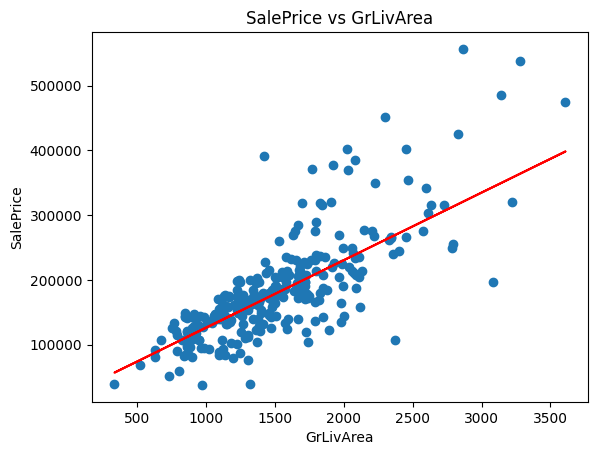

In [90]:
import matplotlib.pyplot as plt
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('SalePrice vs GrLivArea')
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred_model, 'Red')
plt.show()


In [91]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred_model)
print('R2 Score:', r2)

R2 Score: 0.5962403823526143


In [92]:
# Tutorial 3 (with log transformation)

dataset.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.50,421.61,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.90,42.30,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.05,24.28,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.83,9981.26,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.10,1.38,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.58,1.11,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.27,30.20,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.87,20.65,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.69,181.07,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.64,456.10,0.0,0.00,383.5,712.25,5644.0


<Axes: >

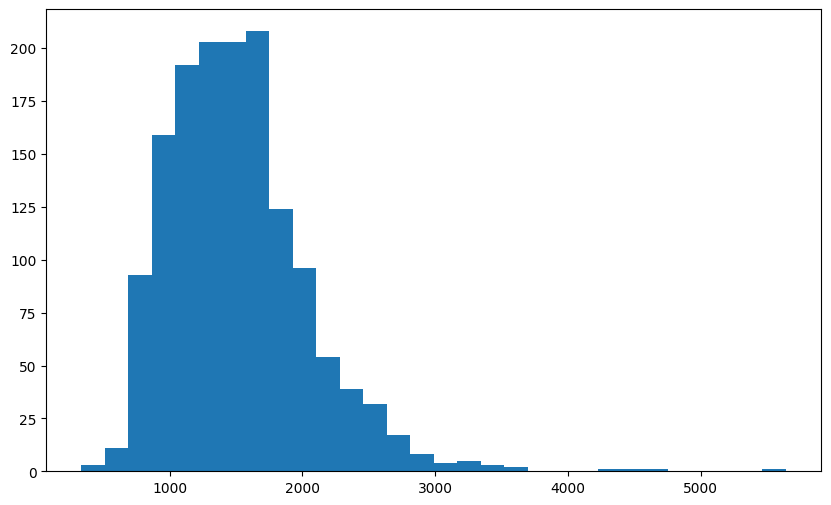

In [93]:
dataset['GrLivArea'].hist(grid=False,
       figsize=(10, 6),
       bins=30)

<Axes: >

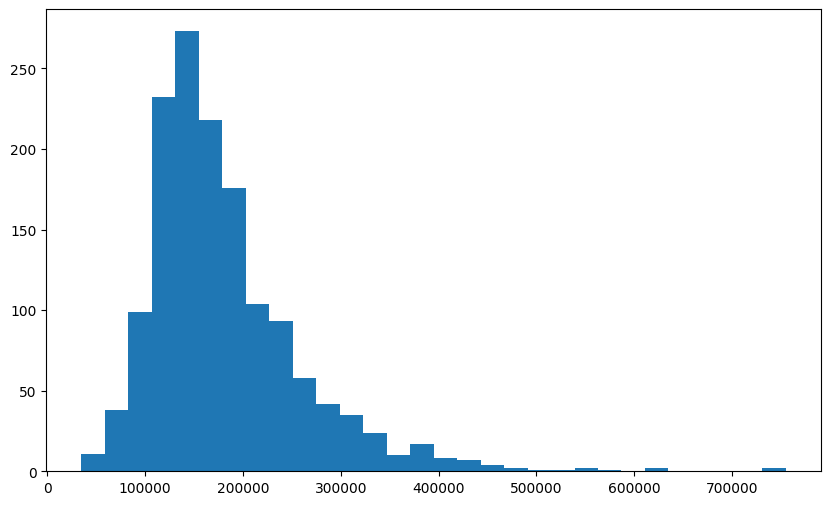

In [94]:
dataset['SalePrice'].hist(grid=False,
       figsize=(10, 6),
       bins=30)

In [95]:
new_df = dataset[['GrLivArea', 'SalePrice']]
new_df.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [96]:
import numpy as np
new_df[["GrLivArea", "SalePrice"]] = pd.DataFrame(
    np.log(new_df[["GrLivArea", "SalePrice"]]), columns=["GrLivArea", "SalePrice"]
)

C:\Users\mtsil\AppData\Local\Temp\ipykernel_22648\3188616411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[["GrLivArea", "SalePrice"]] = pd.DataFrame(


In [97]:
new_df.head()

,GrLivArea,SalePrice
0,7.444249,12.247694
1,7.140453,12.109011
2,7.487734,12.317167
3,7.448334,11.849398
4,7.695303,12.429216


In [98]:
X = new_df[['GrLivArea']]
y = new_df['SalePrice']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [100]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [101]:
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

Intercept:  5.7520139433601685
Coefficient:  [0.862347]


In [102]:
y_pred_model= model.predict(X_test)

In [103]:
model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_model})
model_diff.head()

,Actual value,Predicted value
1436,11.699405,11.582836
57,12.188418,12.176568
780,12.078239,11.903390
382,12.271392,12.214334
1170,12.049419,11.805083


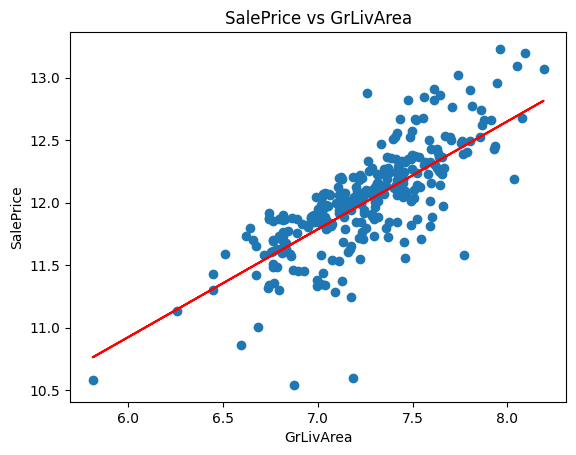

In [104]:
import matplotlib.pyplot as plt
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('SalePrice vs GrLivArea')
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred_model, 'Red')
plt.show()

In [105]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred_model)
print('R2 Score:', r2)

R2 Score: 0.5922429192189722


In [110]:
# Tutorial 4 (with scaling)

pd.set_option('display.max_rows', None) 
dataset = pd.read_csv(r'C:\Users\mtsil\OneDrive\Documents\file.csv', sep = ';')  
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [111]:
new_df = dataset[['GrLivArea', 'SalePrice']]
new_df.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [112]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


standard_scaler = scaler.fit_transform(new_df)


scaler = pd.DataFrame(standard_scaler, columns=new_df.columns)

In [114]:
X = scaler[['GrLivArea']]
y = scaler['SalePrice']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [116]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [117]:
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

Intercept:  -0.011047112832113265
Coefficient:  [0.68958785]


In [118]:
y_pred_model= model.predict(X_test)

In [119]:
model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_model})
model_diff.head()

,Actual value,Predicted value
1436,-0.760826,-0.866256
57,0.196169,0.257458
780,-0.061968,-0.355596
382,0.410233,0.358540
1170,-0.124928,-0.532817


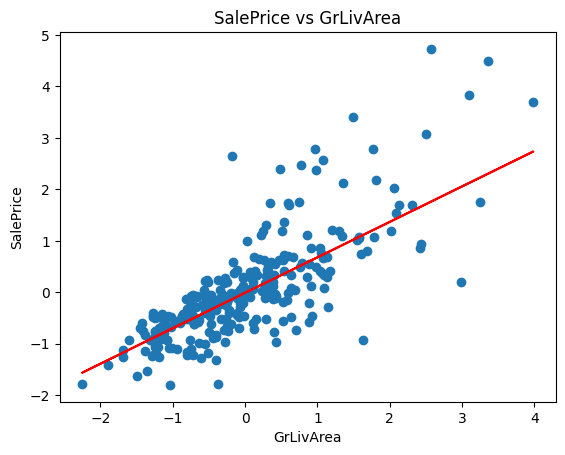

In [120]:
import matplotlib.pyplot as plt
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('SalePrice vs GrLivArea')
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred_model, 'Red')
plt.show()

In [121]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred_model)
print('R2 Score:', r2)

R2 Score: 0.5962403823526142


In [122]:
# Tutorial 5 (with outlier removal)
new_df = dataset[['GrLivArea', 'SalePrice']]
new_df.head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [123]:
import scipy.stats as stats
z = np.abs(stats.zscore(new_df))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
data_clean = new_df[(z<3).all(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(99,3)

(99, 3)

In [124]:
X = data_clean[['GrLivArea']]
y = data_clean['SalePrice']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [127]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [128]:
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

Intercept:  28677.95725521035
Coefficient:  [98.97567266]


In [129]:
y_pred_model= model.predict(X_test)

In [130]:
model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_model})
model_diff.head()

,Actual value,Predicted value
57,196500,198916.114228
1146,180000,157148.380366
377,340000,272751.966032
915,75000,136759.391798
871,200500,195155.038667


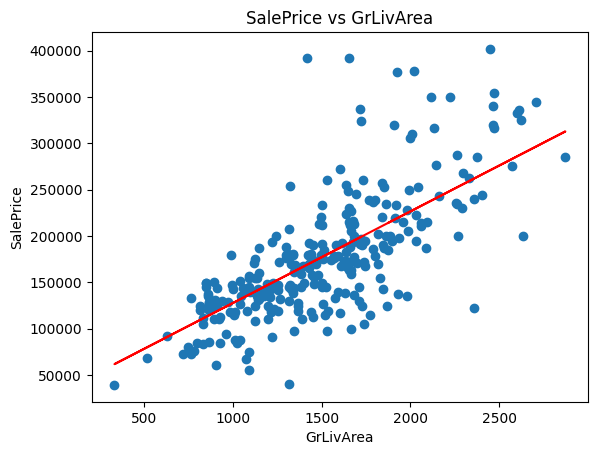

In [131]:
import matplotlib.pyplot as plt
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('SalePrice vs GrLivArea')
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred_model, 'Red')
plt.show()

In [132]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred_model)
print('R2 Score:', r2)

R2 Score: 0.5418234628403555
